In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv("train.csv")
df = titanic.copy()

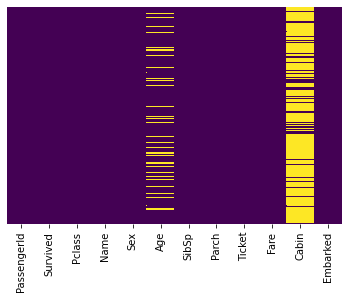

In [3]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

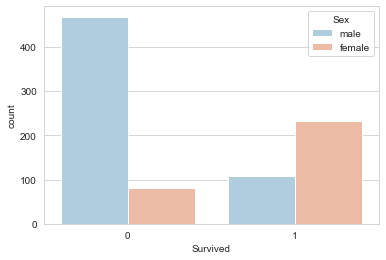

In [4]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=df,palette='RdBu_r')

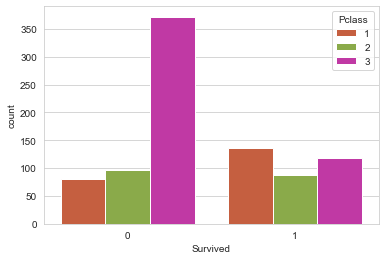

In [5]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=df,palette=["#db532a","#8fba3a","#d622b2"])

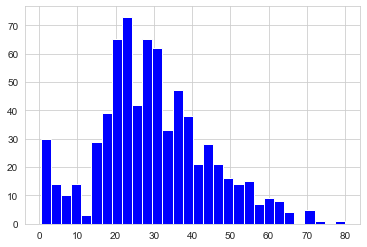

In [6]:
df["Age"].hist(bins=30,color="blue")

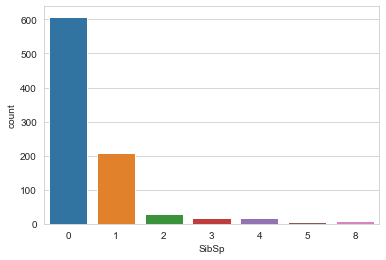

In [7]:
sns.countplot(x="SibSp",data=df)

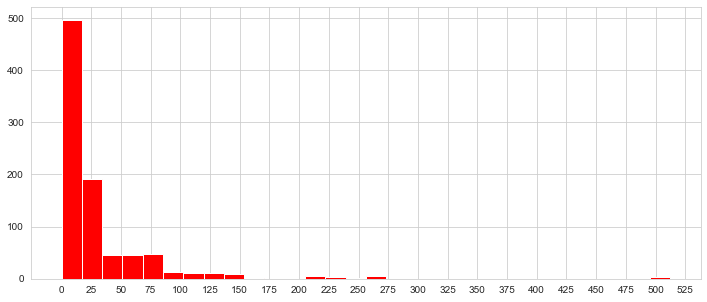

In [8]:
df["Fare"].hist(color="red",bins=30,figsize=(12,5))
plt.xticks(np.arange(0,550,25))
plt.show()

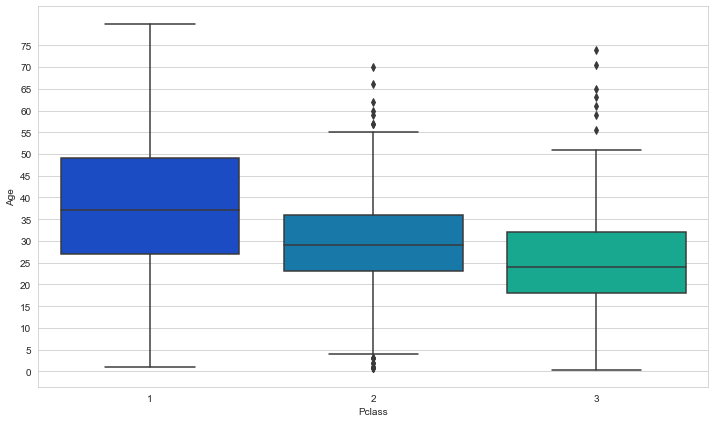

In [9]:
plt.figure(figsize=(12,7))

sns.boxplot(x="Pclass",y="Age",data=df,palette='winter')
plt.yticks(np.arange(0,80,5))
plt.show()

In [10]:
def ageUpdate(ageAndPclass):
    age=ageAndPclass[0]
    pClass = ageAndPclass[1]
    if pd.isnull(age):
        if pClass==1:
            return 37.0
        elif pClass==2:
            return 29.0
        else:
            return 24.0
    else:
        return age
df['Age'] = df[['Age','Pclass']].apply(ageUpdate,axis=1)
df=df.drop("Cabin",axis=1)

In [11]:
embarked=pd.get_dummies(df["Embarked"],drop_first=True)

In [12]:
sex=pd.get_dummies(df["Sex"],drop_first=True)

In [13]:
df=df.drop(["Sex","Embarked","Name","Ticket","PassengerId"],axis=1)

In [14]:
df=pd.concat([df,sex,embarked],axis=1)

In [15]:
#correcting testing data
test = pd.read_csv("test.csv")
df_test = test.copy()
df_test['Age'] = df_test[['Age','Pclass']].apply(ageUpdate,axis=1)
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
df_test=df_test.drop("Cabin",axis=1)
df_test["Fare"]=df_test["Fare"].fillna(0.0)

In [17]:
sex_test=pd.get_dummies(df_test['Sex'],drop_first=True)
embarked_test=pd.get_dummies(df_test["Embarked"],drop_first=True)
df_test=pd.concat([df_test,sex_test,embarked_test],axis=1)
df_test=df_test.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1)

In [18]:
y_train=df["Survived"]
df=df.drop("Survived",axis=1)
x_train=df
x_test=df_test

In [19]:
def converion(q):
    return int(q)
x_train["Q"]=x_train["Q"].apply(converion)

In [20]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(solver='lbfgs', max_iter=1000)
logModel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_predict=logModel.predict(x_test)

In [22]:
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [23]:
logModel.score(x_train,y_train)

0.8069584736251403

In [24]:
logModel.score(x_test,y_predict)

1.0

In [25]:
y_predict=pd.DataFrame({"Surived":y_predict})

In [26]:
y_predict

,Surived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0
